<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m7NLP/d4/notes/NLPDLAIW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os 
from tensorflow import keras
import zipfile
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer

from datetime import datetime
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print(tf.__version__)#check version

2.6.0


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

In [ ]:
!kaggle datasets download -d 'lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'

 35% 9.00M/25.7M [00:00<00:00, 54.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.3MB/s]


In [ ]:
with zipfile.ZipFile('/content/imdb-dataset-of-50k-movie-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
with open('/content/IMDB Dataset.csv', 'r') as f:
  lines =   f.readlines()
  print(lines)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEXWEUW/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEXWEUW/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEXWEUW/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
train_d, test_d = imdb['train'],  imdb['test']#split the data

In [6]:
type(train_d)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [11]:
import numpy as np

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []



for s,l in train_d:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  end_time = datetime.now()
  
for s,l in test_d:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  

In [12]:
training_labels = np.array(training_labels)#converting them into np arrays
testing_labels = np.array(testing_labels)

In [13]:
#some numbers
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok  = '<OOV>'


tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen= max_length, truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen= max_length,truncating=trunc_type)



In [14]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                tf.keras.layers.Flatten(),#could be used also GlobalAvaragePooling1D()
                tf.keras.layers.Dense(6,activation='relu'),
                tf.keras.layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 10
history = model.fit(padded,
          training_labels,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0814e-04 - accuracy: 1.0000 - val_loss: 0.9505 - val_accuracy: 0.8110
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 6.7223e-05 - accuracy: 1.0000 - val_loss: 0.9901 - val_accuracy: 0.8110
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 4.2035e-05 - accuracy: 1.0000 - val_loss: 1.0300 - val_accuracy: 0.8111
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 2.6584e-05 - accuracy: 1.0000 - val_loss: 1.0710 - val_accuracy: 0.8104
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.6836e-05 - accuracy: 1.0000 - val_loss: 1.1097 - val_accuracy: 0.8103
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0668e-05 - accuracy: 1.0000 - val_loss: 1.1503 - val_accuracy: 0.8098
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 6.8344e-06 - accuracy: 1.0000 - val_loss: 1.1897 -

In [22]:
#u can see gru lstm and just none u can execute desired ones as uncommenting
#lstm and gru will take a lot of time
model2 = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                # tf.keras.layers.Flatten(),
                # tf.keras.layers.GlobalAveragePooling1D(),
                tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(6,activation='relu'),
                tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 10
history2 = model2.fit(padded,
          training_labels,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 [==============================] - 86s 105ms/step - loss: 0.5076 - accuracy: 0.7204 - val_loss: 0.3899 - val_accuracy: 0.8244
Epoch 2/10
782/782 [==============================] - 82s 105ms/step - loss: 0.2962 - accuracy: 0.8783 - val_loss: 0.4013 - val_accuracy: 0.8185
Epoch 3/10
782/782 [==============================] - 85s 109ms/step - loss: 0.2269 - accuracy: 0.9117 - val_loss: 0.4426 - val_accuracy: 0.8150
Epoch 4/10
782/782 [==============================] - 85s 108ms/step - loss: 0.1783 - accuracy: 0.9350 - val_loss: 0.4868 - val_accuracy: 0.8121
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.1385 - accuracy: 0.9504 - val_loss: 0.5238 - val_accuracy: 0.8047
Epoch 6/10
782/782 [==============================] - 81s 103ms/step - loss: 0.0997 - accuracy: 0.9651 - val_loss: 0.6093 - val_accuracy: 0.7992
Epoch 7/10
782/782 [==============================] - 81s 104ms/step - loss: 0.0685 - accuracy: 0.9776 - val_loss: 0.7341 - val_ac

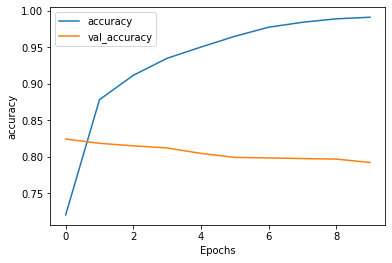

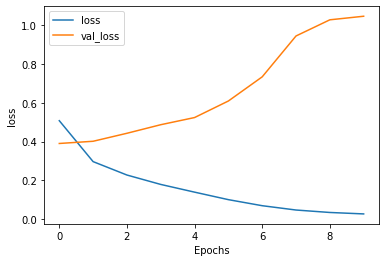

In [25]:
import matplotlib.pyplot as plt

def plot_g(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


plot_g(history,"accuracy")
plot_g(history,'loss')

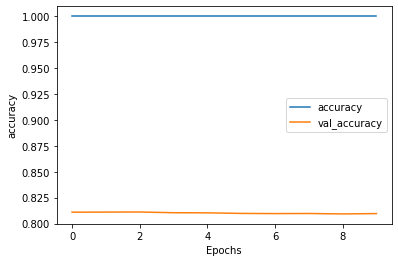

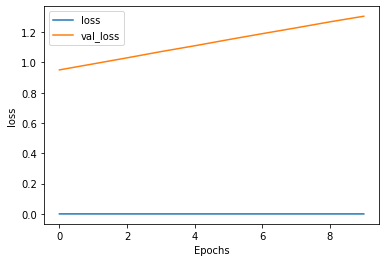

In [19]:
import matplotlib.pyplot as plt

def plot_g(history, string):
  plt.plot(history2.history2[string])
  plt.plot(history2.history2['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


plot_g(history2,"accuracy")
plot_g(history2,'loss')

In [ ]:
e = model.layers[0]

weights = e.get_weights()[0]

print(weights.shape)

(10000, 16)


In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
def decode_reviews(text):
  return '  '.join([reverse_word_index.get(i , '?') for i in text])
print(decode_reviews(padded[0]))
print(training_sentences[0])

?  ?  b  this  was  an  absolutely  terrible  movie  don't  be  <OOV>  in  by  christopher  walken  or  michael  <OOV>  both  are  great  actors  but  this  must  simply  be  their  worst  role  in  history  even  their  great  acting  could  not  redeem  this  movie's  ridiculous  storyline  this  movie  is  an  early  nineties  us  propaganda  piece  the  most  pathetic  scenes  were  those  when  the  <OOV>  rebels  were  making  their  cases  for  <OOV>  maria  <OOV>  <OOV>  appeared  phony  and  her  pseudo  love  affair  with  walken  was  nothing  but  a  pathetic  emotional  plug  in  a  movie  that  was  devoid  of  any  real  meaning  i  am  disappointed  that  there  are  movies  like  this  ruining  <OOV>  like  christopher  <OOV>  good  name  i  could  barely  sit  through  it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acti

In [ ]:
import io


out_v = io.open('vects.tsv','w', encoding= 'utf-8')
out_m  = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1,vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n') #
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')#value of each item


out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vects.tsv')
  files.download("meta.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
out_v

<_io.TextIOWrapper name='vects.tsv' mode='w' encoding='utf-8'>

In [ ]:
type(training_labels)

numpy.ndarray

In [ ]:
training_labels

array([0, 0, 0, ..., 0, 0, 1])